# Extrapolation

**Extrapolation refers to how the model behaves with new data, i.e. outside of the range of values on which it was trained.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# To plot in 3D, i.e. multi-vectors
from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

%matplotlib inline

**The dataset you will be using is basically a sine wave in two dimensions, so the shape of the input data is *N* x 2.** 

**The input X variable is randomly-selected numbers from a uniform distribution between -3 and +3, so moving in both negative and positive directions. The target variable (Y) is a linear function of the cosine of the inputs.**

**The function used to generate Y variable is as follows:**

$y = cos(2x_1) + cos(3x_2)$


In [2]:
N = 1000

X = np.random.random((N, 2)) * 6 - 3 

Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

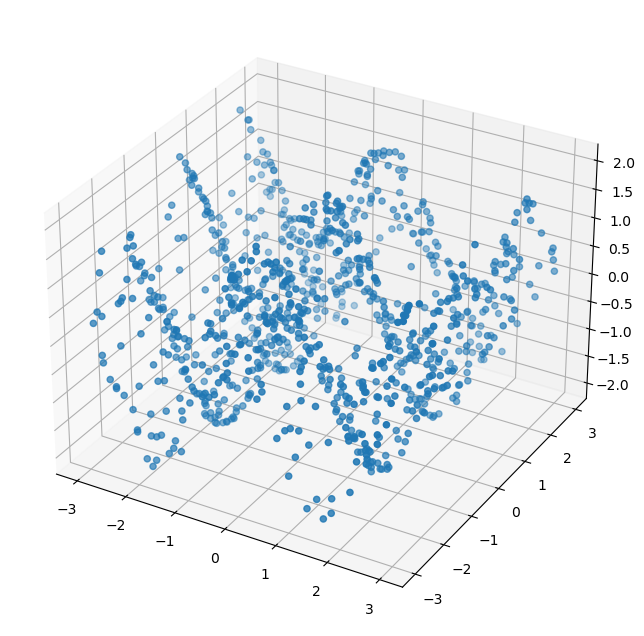

In [3]:
# Plot true data

fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y);

**As stated, it is a repeating sine wave that goes on forever in both directions along the x-axis.**

## Support Vector Regressor model

**Train the Support Vector Machine model on X and Y, then plot the function that the model has learnt from the original data.**

In [4]:
# Balance the model regularization
model = SVR(C=100.)

model.fit(X, Y)

SVR(C=100.0)

### Plot the predictions

**This code is taken from StackOverflow, and is publically accessible.**

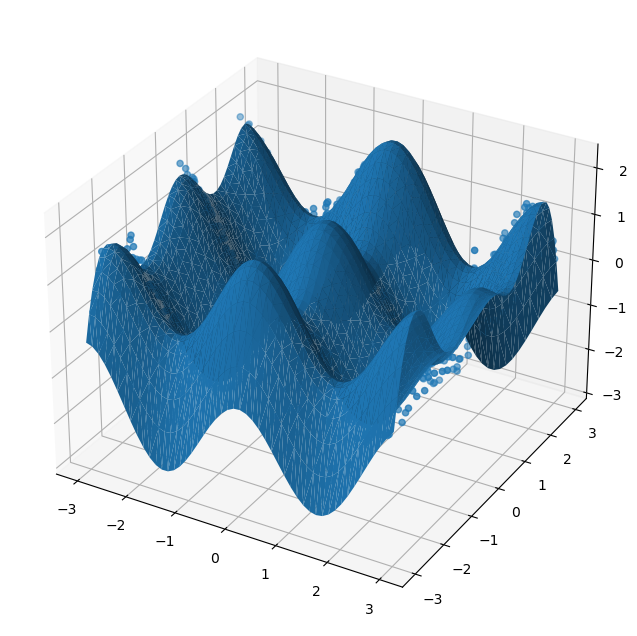

In [5]:
# Plot prediction surface

fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot

# Range of values for plot (-3 to 3)
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()

ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);

**The `SVR` model seems to do a pretty good job of learning the function, i.e. the data.**

### Can it extrapolate?

**To test for extrapolation, run the plotting code again except this time extend the range of values from -5 to +5, i.e. predicting for values outside of the range of the training set (-3, +3).**

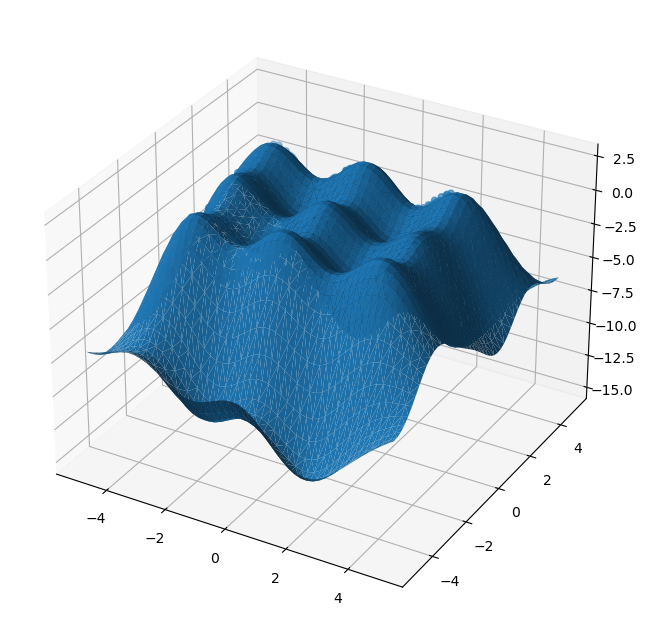

In [6]:
# Plot prediction surface
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot with extended range to (-5, +5)
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()

ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

**If you extend the range of values, you can see that the model does not extrapolate well for values outside the training range (-3 to +3). There is evidence of a slight wave but it seems flattened out since the model is creating a boundary to separate the values.** 

**You know what the true function is since you defined it, and this is not it. Try plotting the true function again below, instead of the model predictions, with the extended range (-5 to +5):**

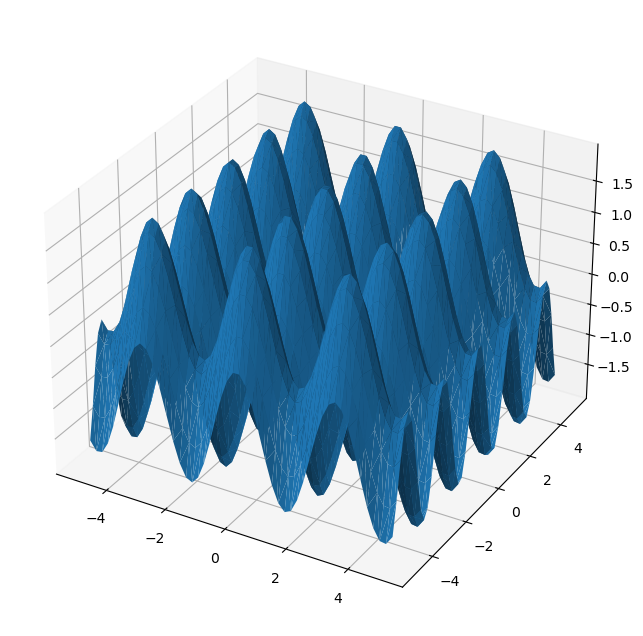

In [7]:
# Plot prediction surface
fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X[:,0], X[:,1], Y)

# Surface plot with extended range to (-5, +5)
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

# The true function
Ytrue = np.cos(2*Xgrid[:,0]) + np.cos(3*Xgrid[:,1])

ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Ytrue, linewidth=0.2, antialiased=True)
plt.show()

**As you can see, this is a a plot of the true function with the repeating sine wave, with longer range. If the model was predicting perfectly, the prediction plot should resemble this.**

## Random Forest Regressor model

**Train the Random Forest Regressor model on X and Y, then plot the function that the model has learnt from the original data (within the range of training values).**

In [8]:
model = RandomForestRegressor()

model.fit(X, Y);

### Plot the predictions

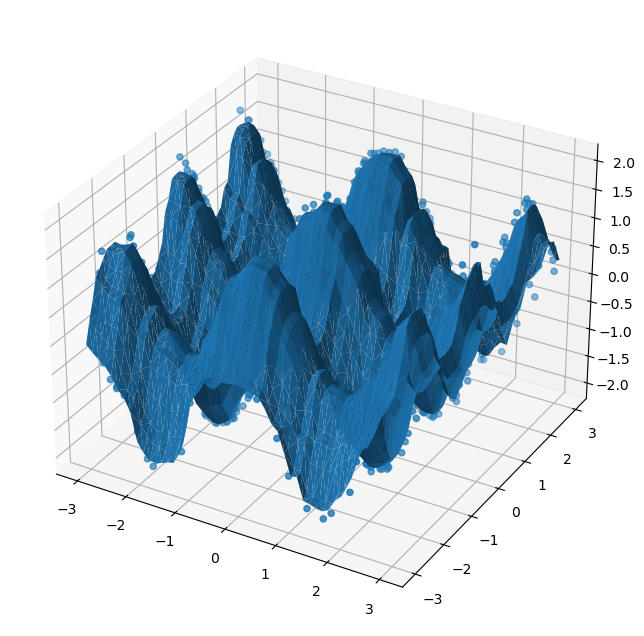

In [9]:
# Plot prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);

**The predictions for Random Forest are more jagged and bumpy, which makes sense seeing as it is a bunch of Decision Trees averaged.**

### Can it extrapolate?

**Expand the plot range from -5 to +5 to see how the model behaves on data outside the training range:**

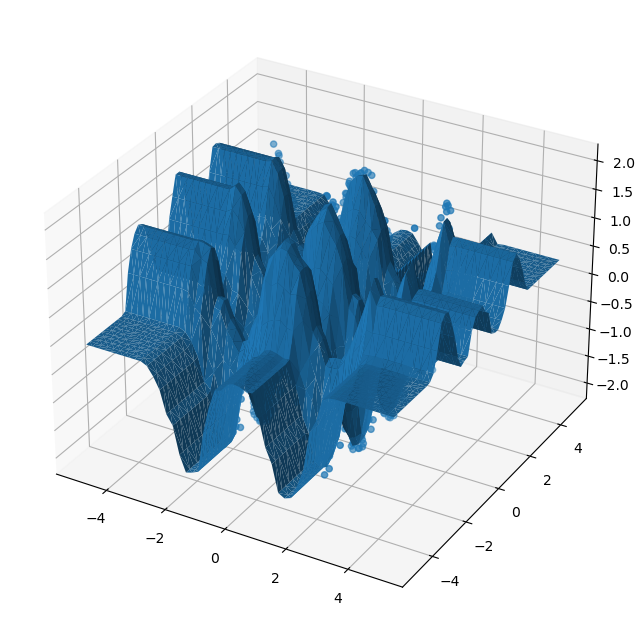

In [10]:
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot with extended range to (-5, +5)
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

**From this plot, you see that Random Forest simply projects the last known prediction for unknown values. Again, this makes sense knowing what you know about Decision trees - there are no more decision splits beyond the training values. However, it does not extrapolate well.**

## MLP Regressor model

**Train a basic neural network, known as MultiLayer Perceptron model, on X and Y variables then plot the function that the model has learnt from the training data.**

In [11]:
model = MLPRegressor(hidden_layer_sizes=128, alpha=0., learning_rate_init=0.01)

model.fit(X, Y);

### Plot the predictions

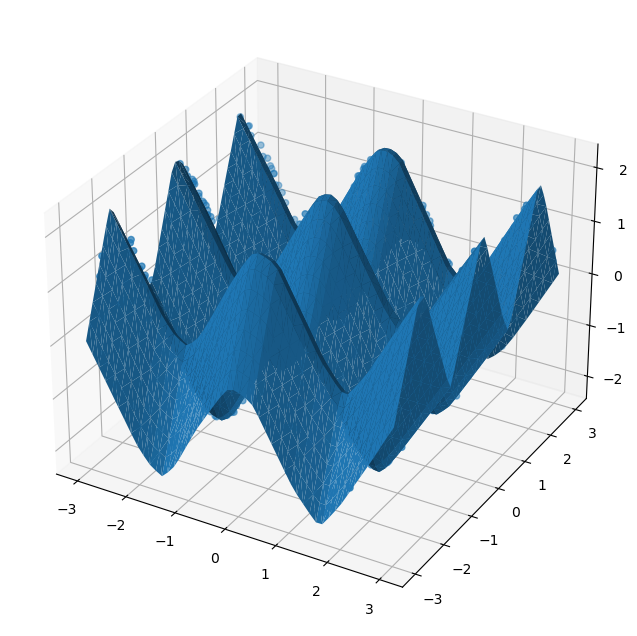

In [12]:
# Plot prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);

**Not bad. MLP seems to fit the data better than the other models, but lets see how well it extrapolates.**

### Can it extrapolate?

**Expand the predictions plot range from -5 to +5 to see how the model behaves on data outside the training range:**

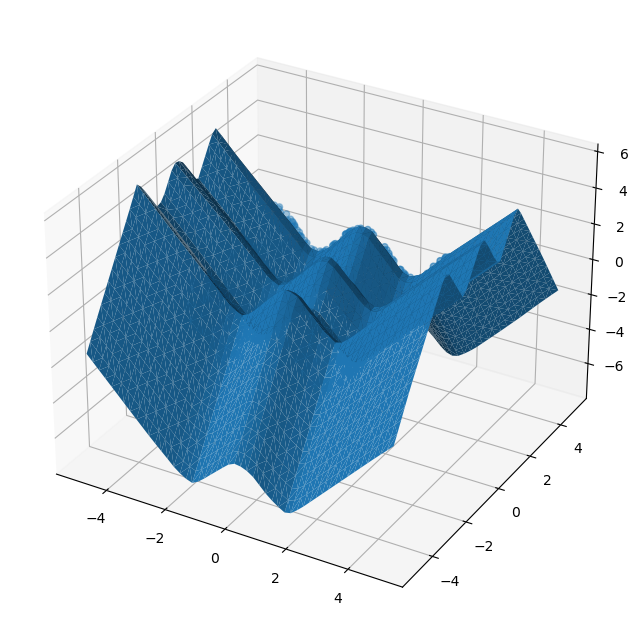

In [13]:
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot with extended range to (-5, +5)
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

**The neural network extends the predictions out in a straight line, i.e. not repeating the wave, which makes sense if you understand neural networks, but this model does not extrapolate well.**

## Extrapolation with Stock Prices

**Lets apply the concept extrapolation to real-world multivariate data. You have seen that the machine-learning models to do not extrapolate well on the sine wave data, which has an identifiable pattern, but lets see with actual data.**

**The data you will use comes from the S&P 500 stock data recorded for every trading day, and contains six time series:**

    Open stock price
    High stock price
    Low stock price
    Close stock price
    Adj Close stock price
    Volume

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('data/SPY.csv', index_col='Date', parse_dates=True)

In [16]:
df.head()

Open        High         Low       Close  Adj Close  \
Date                                                                    
2010-01-04  112.370003  113.389999  111.510002  113.330002  92.246048   
2010-01-05  113.260002  113.680000  112.849998  113.629997  92.490204   
2010-01-06  113.519997  113.989998  113.430000  113.709999  92.555328   
2010-01-07  113.500000  114.330002  113.180000  114.190002  92.946060   
2010-01-08  113.889999  114.620003  113.660004  114.570000  93.255348   

               Volume  
Date                   
2010-01-04  118944600  
2010-01-05  111579900  
2010-01-06  116074400  
2010-01-07  131091100  
2010-01-08  126402800

In [17]:
# Choose 2000 rows as split point

df.shape

(2263, 6)

In [18]:
# Create training and test sets from original data - convert to NumPy array

train = df.iloc[:2000]['Close'].to_numpy()

test = df.iloc[2000:]['Close'].to_numpy()

**Create 'pretend' data as if you have built an AutoRegressive model with two lags, AR(2). The input becomes two-dimensional, with current value x<sub>t</sub> and x<sub>t</sub> given x<sub>t-1</sub> and x<sub>t-2</sub>. This makes it easier for plotting a scatter graph later on.**

In [19]:
X_train = []

for t in range(len(train) - 1):
    x0 = train[t]
    x1 = train[t + 1]
    X_train.append((x0, x1))


In [20]:
X_test = []

for t in range(len(test) - 1):
    x0 = test[t]
    x1 = test[t + 1]
    X_test.append((x0, x1))

In [21]:
# Convert to NumPy array so easier to index

X_train = np.array(X_train)

X_test = np.array(X_test)

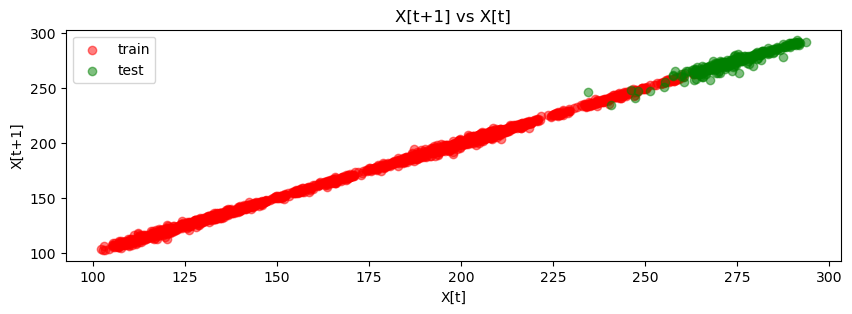

In [22]:
# Plot the inputs

plt.figure(figsize=(10, 3))

plt.xlabel("X[t]")
plt.ylabel("X[t+1]")
plt.title("X[t+1] vs X[t]")
plt.scatter(X_train[:,0], X_train[:,1], c='r', alpha=0.5, label='train')
plt.scatter(X_test[:,0], X_test[:,1], c='g', alpha=0.5, label='test')
plt.legend();

**Training and test sets occupy completely different areas of the input space. If you use stock prices as input for a machine-learning model, the test data will require extrapolation, since the model only gets to train on the red range of values.**

**NOTE: If you believe that `min-max scaling` will help then try it, although it should be obvious why it yields the same result. Scaling the data has no effect on the relationship between its data points.**